In [1]:
from numpy import *
from scipy.signal import fftconvolve
from scipy.special import ellipk,jv
from numpy.random import normal,multinomial
from scipy.linalg import eigh,eig,circulant,toeplitz
from scipy.sparse.linalg import eigsh
from matplotlib.pyplot import *

def getLambda(n,p,mu):
    
    X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
    J = (triu(X)+triu(X,k=1).T)/sqrt(4*n*p)
    
    k = circulant([-2,1]+(int(sqrt(n))-3)*[0]+[1])
    L = kron(k,eye(int(sqrt(n)))) + kron(eye(int(sqrt(n))),k)
    #L = k

    J = J*mu + (1-mu)*L
    return eigh(J,eigvals_only=True)

# arcsine distribution
def alpha(x,delta=1e-5):
    x = (x+2)/2
    if abs(x)<1-delta:
        return 1.0/sqrt(1.0-x**2)/(2*pi)
    else :
        return 0.0
alpha = vectorize(alpha)

# fourier transform of arcsine
def alphaK(k,D=1.0):
    return exp(-2j*D*k)*jv(0,2*D*k) / sqrt(2*pi)
alphaK = vectorize(alphaK)

# semicircle distribution
def W(x,delta=1e-5):
    if abs(x)<2-delta:
        return sqrt(4.0-x**2) / (2*pi)
    else :
        return 0.0
W = vectorize(W)

# free convolution distribution
def gamma(x,p):
    return 1.0/(x**2+p**2)
gamma = vectorize(gamma)

# fourier transform of free convolution distribution
def gammaK(k,p):
    if p > 0.0 :
        return sqrt(pi/2) * exp(-abs(k)*p)/p 
    else :
        return 0.0

gammaK = vectorize(gammaK)


def density(x,y):
    y,bins=histogram(array(y).flatten(),bins=x,density=True)
    x,dx = (bins[1:]+bins[:-1])/2 , (bins[1:]-bins[:-1])/2

    return x,y,dx

In [2]:
def Kappa(t,p,M=1,D=1):
    return ( exp(-2j*t*D) * jv(0,2*t*D) )**M * exp(-abs(t)*p)

def FourierTransform(signal,t,axis=1):
    
    # determine temporal discretisation and range
    dt = t[1:]-t[:-1]; dt = append(dt,dt[-1])
    T = amax(t)
    
    # frequency bins
    w = fft.fftfreq(t.size)*2*pi/dt
    index = argsort(w)
    
    # fourier transform
    signal = fft.fft(signal,axis=axis) * exp(-1j*w*T) / sqrt(2*pi)*dt
    return w[index],signal[::,index]

In [3]:
M,J,D = 2,0.5,0.5

# discretized mesh
t = linspace(-1000,1000,50000)
p = (1.61-log(linspace(0.005,5,200))[::-1])/1.5

tt,pp = meshgrid(t,p)
kappa = Kappa(tt,pp,M,D)

x,kappa = FourierTransform( kappa, t)
epsilon = 1 - J**2 * sqrt(pi/2)/pp * kappa
xx,pp = meshgrid(x,p)

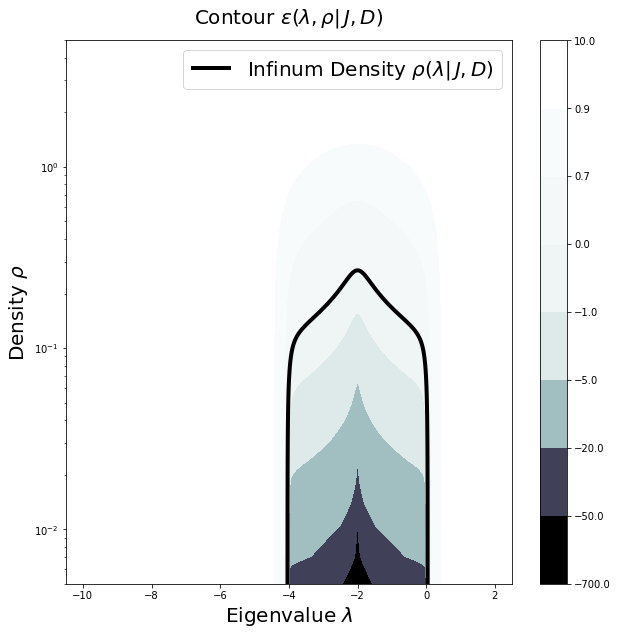

In [5]:
#Plot Result
figure(figsize=(10,10))
levels = [-700,-50, -20, -5, -1, 0, 0.7, 0.9,10]
z = contourf(xx,pp,epsilon,cmap=cm.bone,linewidth=0,
             vmin=-50,vmax=2,levels=levels)

colorbar(z)
z = contour(xx,pp,epsilon,colors='k',linewidths=4,levels=0,label='Density')

#For comparison we plot the analytical solution
xlim(-4*M-2.5,2.5)
ylim(0.005,5)
yscale('log')

title(r'Contour $\varepsilon(\lambda,\rho|\,J,D)$',y=1.02,fontsize=20)
xlabel(r'Eigenvalue $\lambda$',fontsize=20)
ylabel(r'Density $\rho$ ',fontsize=20);

z.collections[0].set_label(r'Infinum Density $\rho(\lambda|\,J,D)$')
legend(fontsize=20);

In [ ]:
def interaction(n,p):
    
    X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
    J = (triu(X)+triu(X,k=1).T)/sqrt(4*n*p)
    return eigh(J,eigvals_only=True),J

In [ ]:
for p in arange(0.01,0.1,0.01):
    Lambda = [ interaction(500,p) for _ in xrange(10) ]
    x = arange(-2,2,0.05)

    x,y,dx = density(x,Lambda)
    color=cm.YlOrRd(1-10*p)
    fill_between(x,y,alpha=0.1,color=color)
    plot(x,y,color=color)
    ylim(0,1.5)

In [ ]:
cm.RdYlBu?

In [6]:
# calculate it
Lambda = []
Epsilon = []

for mu in [0.1,0.25,0.5,0.75,0.9][::-1] :
    
    Lambda += [[ getLambda(100**2,0.5,mu) for _ in xrange(5) ]]
    
    kappa = Kappa(tt,pp,2,mu)
    x,kappa = FourierTransform( kappa, t)
    
    epsilon = 1 - (1-mu)**2 * sqrt(pi/2)/pp * kappa
    Epsilon += [ epsilon ]

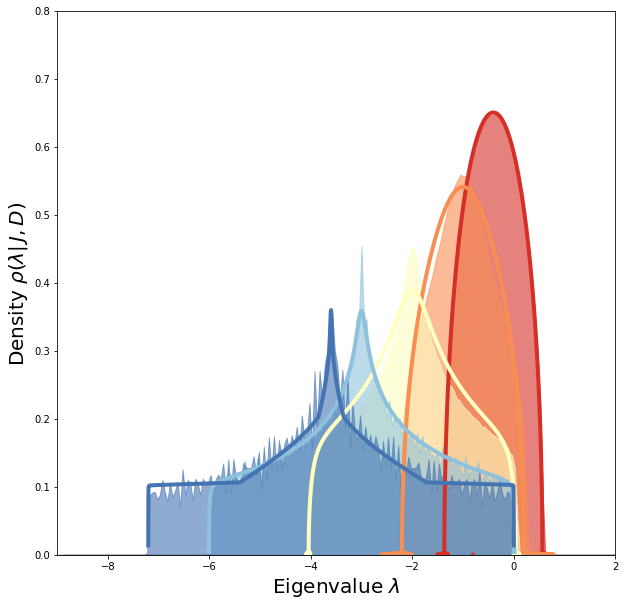

In [19]:
# show us
figure(figsize=(10,10))
x = arange(-9,3,0.05)
N = [1.35,1.17,0.69,0.19,0.035]
for i,mu in enumerate([0.1,0.25,0.5,0.75,0.9]) :
    
    x,y,dx = density(x,Lambda[i])
    color=cm.RdYlBu(mu)
    fill_between(x,y,alpha=0.6,color=color)
    
    z = contour(xx,pp/N[i],Epsilon[::-1][i],
                colors=[color,],
                linewidths=4,levels=0)
    

xlim(-9,2)
ylim(0,0.8)
xlabel(r'Eigenvalue $\lambda$',fontsize=20)
ylabel(r'Density $\rho(\lambda|\,J,D)$ ',fontsize=20);

In [ ]:
sum(Epsilon[::-1][-1] < 0

In [ ]:
    z = contour(xx,pp/(pi*(1-mu)**2),epsilon,
                colors=[color,],
                linewidths=4,levels=0)
    
xlim(-5,2)
ylim(0,10.4)

In [ ]:
yyy = array([
    genfromtxt('/home/gszep/'+str(i)+'.csv',
               dtype=float,delimiter=',')[::,1]
 for i in xrange(1,6)])

In [ ]:
plot(arange(-4.5,1.51,0.01),yyy.T)

In [ ]:
figure(figsize=(10,10))
i = 0; mu = 0
x,y,dx = density(x,[ getLambda(40**2,0.5,1) for _ in xrange(5) ])
color=cm.RdYlBu(mu)
fill_between(x,y,alpha=0.6,color=color)
plot(x,2*W(x/0.5),color=color,linewidth=4)


xlim(-2,2)
ylim(0,0.8)
xlabel(r'Scaled Eigenvalue $\lambda/\,2J$',fontsize=20)
ylabel(r'Semicircle Density $\cap(\lambda|\,J)$ ',fontsize=20);

In [ ]:
dx = 0.001
x = arange(-100,100,dx)
y = alpha(x)

figure(figsize=(10,6))
color=cm.RdYlBu(1.0)

plot(x,y,color=color,alpha=0.4,linewidth=4)
fill_between(x,y,color=color,alpha=0.2)


xlim(-5,1); ylim(0,0.4)
xlabel(r'Scaled Eigenvalue $\frac{\lambda}{M}$',fontsize=20)
ylabel(r'Laplacian Density $\Delta_M(\lambda)$ ',fontsize=20)

for M in xrange(2,10):
    y = fftconvolve(alpha(x),y*dx,mode='same')
    plot(x/M,y,color=color,alpha=0.4,linewidth=4)
    fill_between(x/M,y,color=color,alpha=0.2)



In [ ]:
n,p = 3000,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 3000,0.1
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);


n,p = 3000,0.5
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 300,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 300,0.1
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);


n,p = 300,0.5
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
n,p = 2000,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (-triu(X)+triu(X,k=1).T)/sqrt(4*n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

X = normal(size=(n,n))
J = (-triu(X)+triu(X,k=1).T)/sqrt(4*n)
    
Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2

plot(bins,hist);
plot(bins,lattice(bins));

In [ ]:
n = 5000
x,y = arange(0,1,0.0001), arange(0,1,0.001)
x,y = meshgrid(x,y)
vals = 2*( cos(2*pi*x)-1 ) #+ 2*( cos(2*pi*y)-1 )

#plot(Lambda[0])
#axhline(0)
contourf(x,y,vals)
colorbar()

In [ ]:
Lambda = vals.flatten()
hist,bins=histogram(Lambda,bins=500,density=True)
dbins = (bins[1:]-bins[:-1])
bins = (bins[:-1]+bins[1:])/2


plot(bins,hist);
#plot(bins,lattice(bins));
plot(bins,d(bins));

In [ ]:
sum(d(bins)*dbins[0])

In [ ]:
sum(fftconvolve(d(bins),d(bins))*dbins[0])

In [ ]:
plot(fftconvolve(d(bins),d(bins)))

In [ ]:
sum(d(bins)*dbins)

In [ ]:
Lambda = [ getLambda(70,1) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.5) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.25) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.0) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
n=5
k = n**2 * circulant([-2,1]+(n-3)*[0]+[1])
L = kron(k,eye(n)) + kron(eye(n),k)

In [ ]:
matshow(L)

In [ ]:
plot([1,2,3,4,5]);
text(1,1,'hello');

In [ ]:
text?